In [1]:
import pandas as pd

data = pd.read_csv('Salary_Data.csv')
x = data.loc[:, ['YearsExperience']]
y = data.loc[:, ['Salary']]
data

,YearsExperience,Salary
0,0.3,36.2
1,0.6,36.6
2,0.8,42.8
3,1.1,39.3
4,1.3,46.2
5,1.5,37.7
6,2.0,43.5
7,2.2,39.8
8,2.9,56.6
9,3.0,60.1


In [2]:
from sklearn.model_selection import train_test_split
import torch

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=87)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

x_train = torch.from_numpy(x_train)
x_test = torch.from_numpy(x_test)
y_train = torch.from_numpy(y_train)
y_test = torch.from_numpy(y_test)

In [3]:
from torch import nn
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w = nn.Parameter(torch.rand(1, requires_grad=True))
        self.b = nn.Parameter(torch.rand(1, requires_grad=True))
    
    def forward(self, x):
        return self.w * x + self.b

In [4]:
torch.manual_seed(87)
model = LinearRegressionModel()
# list(model.parameters())
model.state_dict()

OrderedDict([('w', tensor([0.0036])), ('b', tensor([0.8931]))])

In [5]:
y_pred = model(x_test)
y_pred, y_test

(tensor([[0.9149],
         [0.9312],
         [0.8953],
         [0.9145],
         [0.9279],
         [0.9065],
         [0.8978]], dtype=torch.float64, grad_fn=<AddBackward0>),
 tensor([[ 93.9000],
         [121.8000],
         [ 36.6000],
         [ 81.3000],
         [112.6000],
         [ 57.1000],
         [ 46.2000]], dtype=torch.float64))

In [6]:
cost_function = nn.MSELoss()
y_pred = model(x_train)
cost = cost_function(y_pred, y_train)
print(cost)
print(model.state_dict())
print('\n')

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model(x_train)
cost = cost_function(y_pred, y_train)
print(cost)
print(model.state_dict())

tensor(5627.4383, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('w', tensor([0.0036])), ('b', tensor([0.8931]))])


tensor(944.6858, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('w', tensor([8.1354])), ('b', tensor([2.2939]))])


In [7]:
epochs = 10000# epochs: 代表完整的把資料看過一遍

train_cost_hist = []
test_cost_hist = []

for epoch in range(epochs + 1):
    model.train()

    train_pred = model(x_train)
    train_cost = cost_function(train_pred, y_train)

    train_cost_hist.append(train_cost.detach().numpy())# 因為train_cost_hist有追蹤梯度，所以要先detach()

    optimizer.zero_grad()
    train_cost.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(x_test)
        test_cost = cost_function(test_pred, y_test)

        test_cost_hist.append(test_cost.numpy())

    if epoch%1000 == 0:
        print(f"Epoch: {epoch:5}, Train Cost: {train_cost: .4e}, Test Cost: {test_cost: .4e}")

Epoch:     0, Train Cost:  9.4469e+02, Test Cost:  3.5138e+02
Epoch:  1000, Train Cost:  3.2599e+01, Test Cost:  3.4706e+01
Epoch:  2000, Train Cost:  3.2594e+01, Test Cost:  3.4187e+01
Epoch:  3000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch:  4000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch:  5000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch:  6000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch:  7000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch:  8000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch:  9000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01
Epoch: 10000, Train Cost:  3.2594e+01, Test Cost:  3.4185e+01


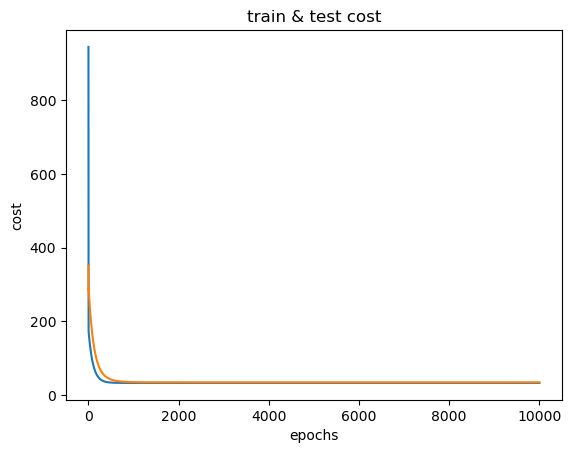

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(0, epochs + 1), train_cost_hist, label='train cost')
plt.plot(range(0, epochs + 1), test_cost_hist, label='test cost')
plt.title("train & test cost")
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

In [9]:
print(model.state_dict())

print('\n')

print(model.w, model.b)

OrderedDict([('w', tensor([9.3308])), ('b', tensor([26.6287]))])


Parameter containing:
tensor([9.3308], requires_grad=True) Parameter containing:
tensor([26.6287], requires_grad=True)


In [10]:
model.eval()
with torch.inference_mode():
    y_pred = model(x_test)
y_pred, y_test

(tensor([[ 82.6135],
         [124.6020],
         [ 32.2271],
         [ 81.6804],
         [116.2043],
         [ 61.1526],
         [ 38.7587]], dtype=torch.float64),
 tensor([[ 93.9000],
         [121.8000],
         [ 36.6000],
         [ 81.3000],
         [112.6000],
         [ 57.1000],
         [ 46.2000]], dtype=torch.float64))

In [11]:
torch.save(obj=model.state_dict(), f='model/pytorch_linear_regression.pth')

In [12]:
model_1 = LinearRegressionModel()
model_1.state_dict()

OrderedDict([('w', tensor([0.4548])), ('b', tensor([0.9815]))])

In [13]:
model_1.load_state_dict(torch.load(f='model/pytorch_linear_regression.pth'))
model_1.state_dict()

OrderedDict([('w', tensor([9.3308])), ('b', tensor([26.6287]))])

In [14]:
model_1.eval()
with torch.inference_mode():
    y_pred = model_1(x_test)
y_pred, y_test

(tensor([[ 82.6135],
         [124.6020],
         [ 32.2271],
         [ 81.6804],
         [116.2043],
         [ 61.1526],
         [ 38.7587]], dtype=torch.float64),
 tensor([[ 93.9000],
         [121.8000],
         [ 36.6000],
         [ 81.3000],
         [112.6000],
         [ 57.1000],
         [ 46.2000]], dtype=torch.float64))

### 法二:利用nn.Linear以及將訓練，測試步驟寫成函式

In [15]:
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1, dtype=torch.float64)# 記得先進行型態的轉換
        # self.w = nn.Parameter(torch.rand(1, requires_grad=True))
        # self.b = nn.Parameter(torch.rand(1, requires_grad=True))

    def forward(self, x):
        return self.linear_layer(x)
        # return self.w * x + self.b

In [16]:
torch.manual_seed(87)
model_2 = LinearRegressionModel2()
model_2, model_2.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight',
               tensor([[-0.9419]], dtype=torch.float64)),
              ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))]))

In [17]:
x_train = x_train.reshape(-1, 1)
x_test = x_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# -1代表自動轉換

In [18]:
x_train.dtype, model_2.linear_layer.weight.dtype# 檢查型態是否一致

(torch.float64, torch.float64)

In [19]:
cost_function = nn.MSELoss()
y_pred = model_2(x_train)
cost = cost_function(y_pred, y_train)
print(cost)
print(model_2.state_dict())
print('\n')

optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)
optimizer.zero_grad()
cost.backward()
optimizer.step()

y_pred = model_2(x_train)
cost = cost_function(y_pred, y_train)
print(cost)
print(model_2.state_dict())

tensor(6515.9517, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[-0.9419]], dtype=torch.float64)), ('linear_layer.bias', tensor([0.2761], dtype=torch.float64))])


tensor(1074.6975, dtype=torch.float64, grad_fn=<MseLossBackward0>)
OrderedDict([('linear_layer.weight', tensor([[7.8250]], dtype=torch.float64)), ('linear_layer.bias', tensor([1.7790], dtype=torch.float64))])


In [20]:
def train_step(model, x_train, y_train, cost_function, optimizer, train_cost_hist):
    train_cost_hist = []
    model_2.train()

    train_pred = model_2(x_train)
    train_cost = cost_function(train_pred, y_train)

    train_cost_hist.append(train_cost.detach().numpy())# 因為train_cost_hist有追蹤梯度，所以要先detach()

    optimizer.zero_grad()
    train_cost.backward()
    optimizer.step()

    return train_cost


def test_step(model, x_test, y_test, cost_function, test_cost_hist):
    test_cost_hist = []

    model.eval()
    with torch.inference_mode():
        test_pred = model_2(x_test)
        test_cost = cost_function(test_pred, y_test)

        test_cost_hist.append(test_cost)

    return test_cost

In [21]:
epochs = 10000# epochs: 代表完整的把資料看過一遍

for epoch in range(epochs + 1):
    train_cost_hist = []
    test_cost_hist = []
    
    if epoch%1000 == 0:
        print(f"Epoch: {epoch:5}, Train Cost: {train_step(model_2, x_train, y_train, cost_function, optimizer, train_cost_hist): .4e}, Test Cost: {test_step(model_2, x_test, y_test, cost_function, test_cost_hist): .4e}")

Epoch:     0, Train Cost:  1.0747e+03, Test Cost:  3.7437e+02
Epoch:  1000, Train Cost:  3.0676e+02, Test Cost:  2.9140e+02
Epoch:  2000, Train Cost:  1.9727e+02, Test Cost:  2.9270e+02
Epoch:  3000, Train Cost:  1.8057e+02, Test Cost:  2.9651e+02
Epoch:  4000, Train Cost:  1.7695e+02, Test Cost:  2.9718e+02
Epoch:  5000, Train Cost:  1.7519e+02, Test Cost:  2.9611e+02
Epoch:  6000, Train Cost:  1.7371e+02, Test Cost:  2.9433e+02
Epoch:  7000, Train Cost:  1.7227e+02, Test Cost:  2.9229e+02
Epoch:  8000, Train Cost:  1.7086e+02, Test Cost:  2.9015e+02
Epoch:  9000, Train Cost:  1.6946e+02, Test Cost:  2.8800e+02
Epoch: 10000, Train Cost:  1.6807e+02, Test Cost:  2.8585e+02


In [22]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[12.8993]], dtype=torch.float64)),
             ('linear_layer.bias', tensor([3.9157], dtype=torch.float64))])

### 在GPU上面執行，可以讓運算加速

In [23]:
!nvidia-smi

Tue Feb 11 08:59:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1650      WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   40C    P0             13W /   50W |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [24]:
torch.cuda.is_available()

False